               Model          MSE        R2
0  Linear Regression   556.171214  0.848087
1       SVM (Linear)   914.051979  0.750336
2         SVM (Poly)  1782.588794  0.513103
3          SVM (RBF)  2603.467645  0.288888
4      Decision Tree   135.739130  0.962924
5      Random Forest    64.538961  0.982372
6           AdaBoost   308.000384  0.915873
7  Gradient Boosting    45.998790  0.987436


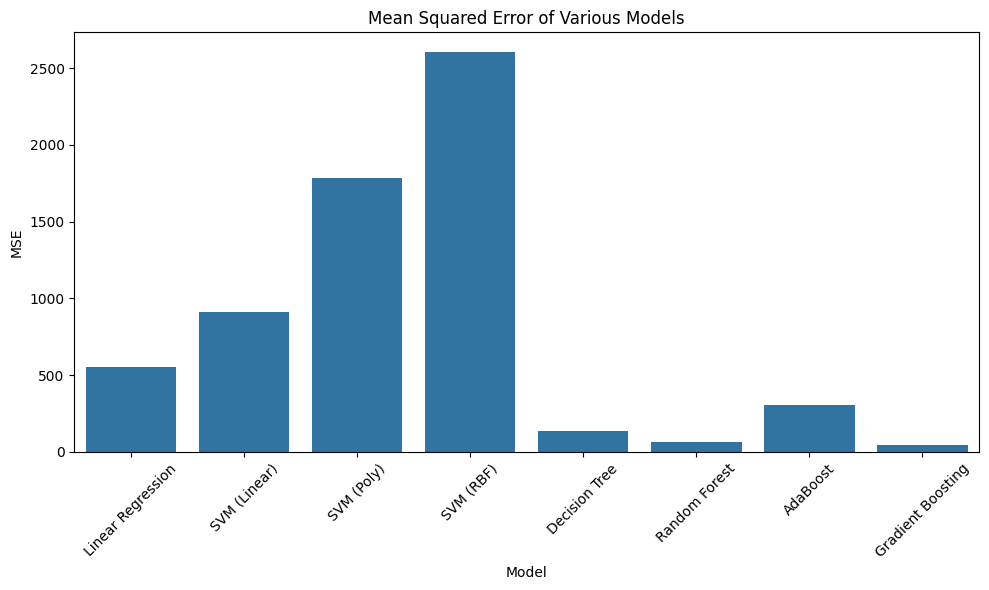

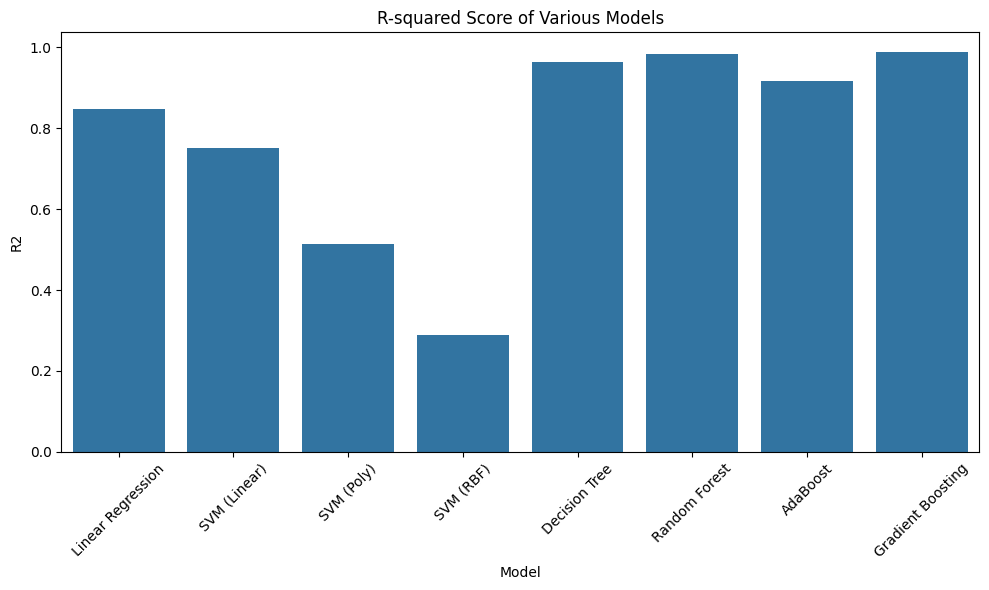

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Tuned Model Results:
                   Best Score
SVM (RBF)            0.898465
Decision Tree        0.960727
Random Forest        0.984002
AdaBoost             0.930516
Gradient Boosting    0.995316


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


               Model   MSE Before   MSE After  R2 Before  R2 After
0          SVM (RBF)  2603.467645  556.331403   0.288888  0.848044
1      Decision Tree   135.739130  140.956522   0.962924  0.962924
2      Random Forest    64.538961   55.953730   0.982372  0.982194
3           AdaBoost   308.000384  293.859506   0.915873  0.911219
4  Gradient Boosting    45.998790   38.500036   0.987436  0.989484


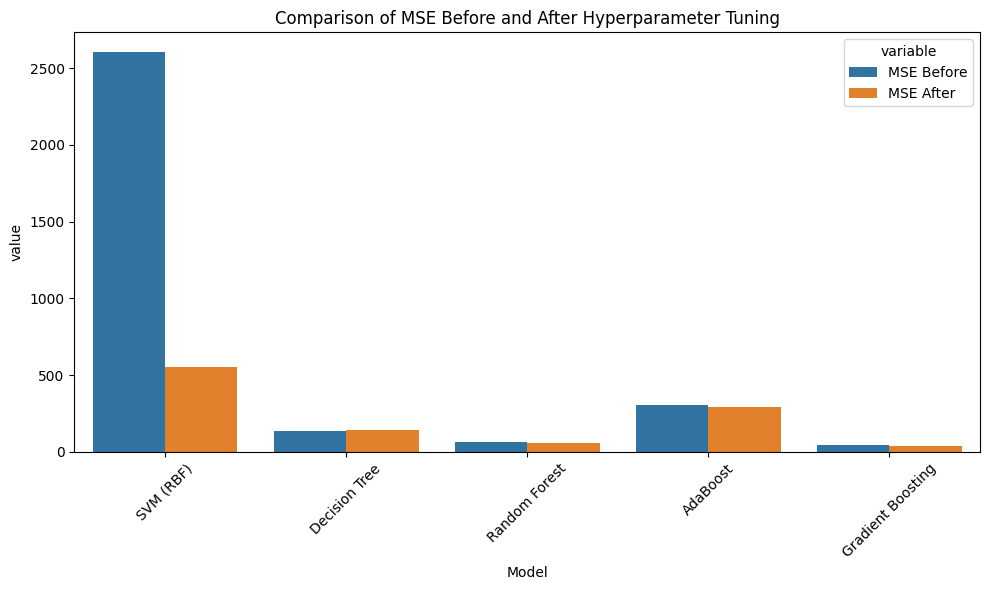

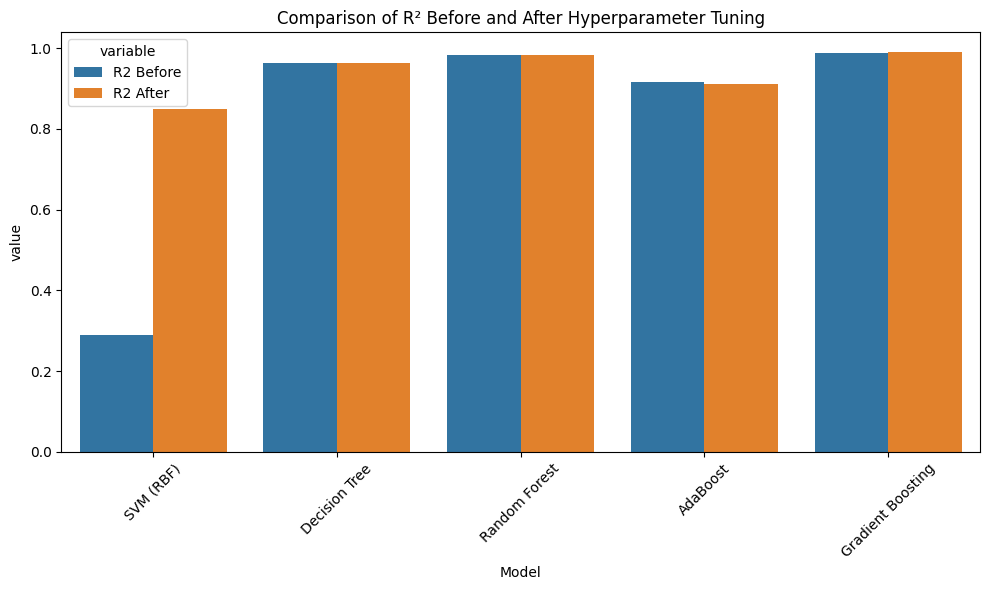

PCA Metrics:
          MSE        R2
0  2611.07035  0.286812
Selected Features Metrics:
           MSE        R2
0  3072.419849  0.160798


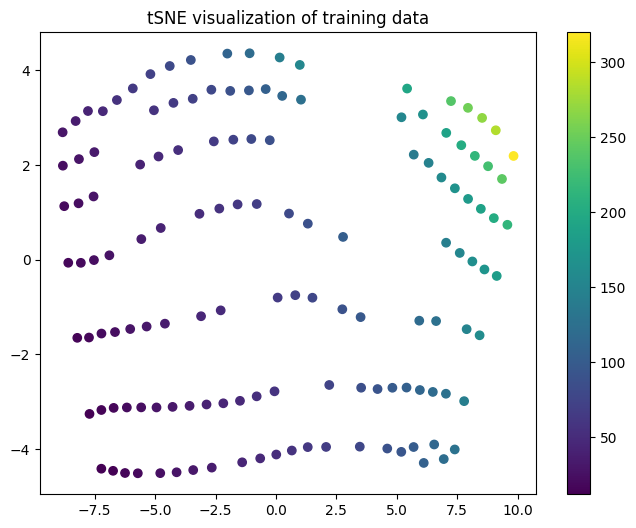

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Direct download link to the Google Sheets file
url = 'https://docs.google.com/spreadsheets/d/1xFMPVMOaWONiU_mNPUcceooX0DZ-LK_c/export?format=xlsx'

# Load dataset
data = pd.read_excel(url)

# Data preparation
X = data.drop(columns=['Number of Barriers'])
y = data['Number of Barriers']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVM (Linear)': SVR(kernel='linear'),
    'SVM (Poly)': SVR(kernel='poly', degree=3),
    'SVM (RBF)': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Fit models and predict
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_test_scaled)

# Calculate metrics
results = {
    'Model': [],
    'MSE': [],
    'R2': []
}

for name, y_pred in predictions.items():
    results['Model'].append(name)
    results['MSE'].append(mean_squared_error(y_test, y_pred))
    results['R2'].append(r2_score(y_test, y_pred))

results_df = pd.DataFrame(results)

# Display the results in tabular form
print(results_df)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error of Various Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mse_plot.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('R-squared Score of Various Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('r2_plot.png')
plt.show()

# Hyperparameter tuning for regressors
param_grids = {
    'SVM (RBF)': {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt']},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}


best_params = {}
best_scores = {}
for name, param_grid in param_grids.items():
    model = models[name]
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_params[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_

# Print tuned model results
print("Tuned Model Results:")
print(pd.DataFrame(best_scores, index=['Best Score']).T)

# Compare results before and after hyperparameter tuning
results_tuned = {
    'Model': ['SVM (RBF)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'MSE Before': [results_df.loc[results_df['Model'] == 'SVM (RBF)', 'MSE'].values[0],
                   results_df.loc[results_df['Model'] == 'Decision Tree', 'MSE'].values[0],
                   results_df.loc[results_df['Model'] == 'Random Forest', 'MSE'].values[0],
                   results_df.loc[results_df['Model'] == 'AdaBoost', 'MSE'].values[0],
                   results_df.loc[results_df['Model'] == 'Gradient Boosting', 'MSE'].values[0]],
    'MSE After': [mean_squared_error(y_test, models['SVM (RBF)'].set_params(**best_params['SVM (RBF)']).fit(X_train_scaled, y_train).predict(X_test_scaled)),
                  mean_squared_error(y_test, models['Decision Tree'].set_params(**best_params['Decision Tree']).fit(X_train_scaled, y_train).predict(X_test_scaled)),
                  mean_squared_error(y_test, models['Random Forest'].set_params(**best_params['Random Forest']).fit(X_train_scaled, y_train).predict(X_test_scaled)),
                  mean_squared_error(y_test, models['AdaBoost'].set_params(**best_params['AdaBoost']).fit(X_train_scaled, y_train).predict(X_test_scaled)),
                  mean_squared_error(y_test, models['Gradient Boosting'].set_params(**best_params['Gradient Boosting']).fit(X_train_scaled, y_train).predict(X_test_scaled))],
    'R2 Before': [results_df.loc[results_df['Model'] == 'SVM (RBF)', 'R2'].values[0],
                  results_df.loc[results_df['Model'] == 'Decision Tree', 'R2'].values[0],
                  results_df.loc[results_df['Model'] == 'Random Forest', 'R2'].values[0],
                  results_df.loc[results_df['Model'] == 'AdaBoost', 'R2'].values[0],
                  results_df.loc[results_df['Model'] == 'Gradient Boosting', 'R2'].values[0]],
    'R2 After': [r2_score(y_test, models['SVM (RBF)'].set_params(**best_params['SVM (RBF)']).fit(X_train_scaled, y_train).predict(X_test_scaled)),
                 r2_score(y_test, models['Decision Tree'].set_params(**best_params['Decision Tree']).fit(X_train_scaled, y_train).predict(X_test_scaled)),
                 r2_score(y_test, models['Random Forest'].set_params(**best_params['Random Forest']).fit(X_train_scaled, y_train).predict(X_test_scaled)),
                 r2_score(y_test, models['AdaBoost'].set_params(**best_params['AdaBoost']).fit(X_train_scaled, y_train).predict(X_test_scaled)),
                 r2_score(y_test, models['Gradient Boosting'].set_params(**best_params['Gradient Boosting']).fit(X_train_scaled, y_train).predict(X_test_scaled))]
}

results_tuned_df = pd.DataFrame(results_tuned)

print(results_tuned_df)

# Plotting Comparison of MSE before and after tuning
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='variable', data=pd.melt(results_tuned_df[['Model', 'MSE Before', 'MSE After']], ['Model']))
plt.title('Comparison of MSE Before and After Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mse_comparison.png')
plt.show()

# Plotting Comparison of R² before and after tuning
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='variable', data=pd.melt(results_tuned_df[['Model', 'R2 Before', 'R2 After']], ['Model']))
plt.title('Comparison of R² Before and After Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('r2_comparison.png')
plt.show()


# Feature reduction with PCA
pca = PCA(n_components=X_train_scaled.shape[1] // 2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the best-performing model on PCA reduced data (example with SVM)
best_svm_model = SVR(kernel='rbf', C=param_grids['SVM (RBF)']['C'][1], gamma=param_grids['SVM (RBF)']['gamma'][1])
best_svm_model.fit(X_train_pca, y_train)
y_pred_pca = best_svm_model.predict(X_test_pca)

# Calculate PCA metrics
pca_metrics = {
    'MSE': mean_squared_error(y_test, y_pred_pca),
    'R2': r2_score(y_test, y_pred_pca)
}

# Print PCA metrics
print("PCA Metrics:")
print(pd.DataFrame([pca_metrics]))

# Feature selection with SelectPercentile
selector = SelectPercentile(score_func=f_classif, percentile=50)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train the best-performing model on selected features (example with SVM)
best_svm_model.fit(X_train_selected, y_train)
y_pred_selected = best_svm_model.predict(X_test_selected)

# Calculate selected features metrics
selected_metrics = {
    'MSE': mean_squared_error(y_test, y_pred_selected),
    'R2': r2_score(y_test, y_pred_selected)
}

# Print selected features metrics
print("Selected Features Metrics:")
print(pd.DataFrame([selected_metrics]))


# Data visualization with tSNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('tSNE visualization of training data')
plt.colorbar()
plt.savefig('tSNE_visualization.png')
plt.show()
